# System Design as Code

[Install diagram package](https://diagrams.mingrammer.com/docs/getting-started/installation)

In [ ]:
!pip install diagrams

## All Imports

In [24]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import EC2, ECS, EKS, Lambda
from diagrams.aws.database import ElastiCache, RDS, Redshift
from diagrams.aws.network import ELB, Route53
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3


## Grouped Workers on AWS

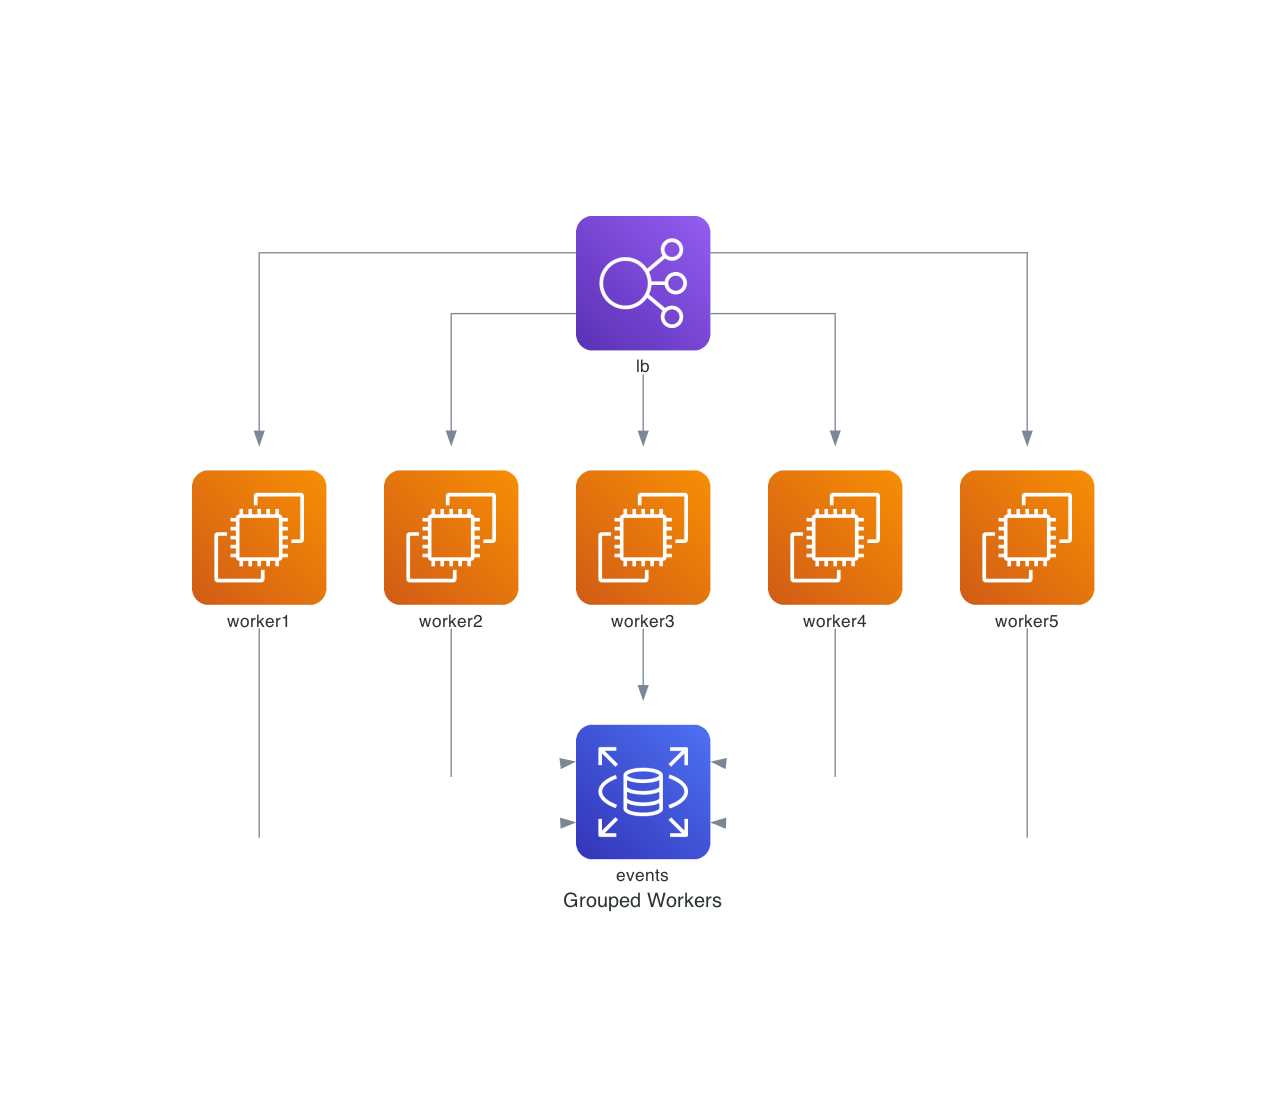

In [21]:
with Diagram("Grouped Workers", show=False, direction="TB") as diag1:
    ELB("lb") >> [EC2("worker1"),
                  EC2("worker2"),
                  EC2("worker3"),
                  EC2("worker4"),
                  EC2("worker5")] >> RDS("events")
diag1

## Clustered Web Services

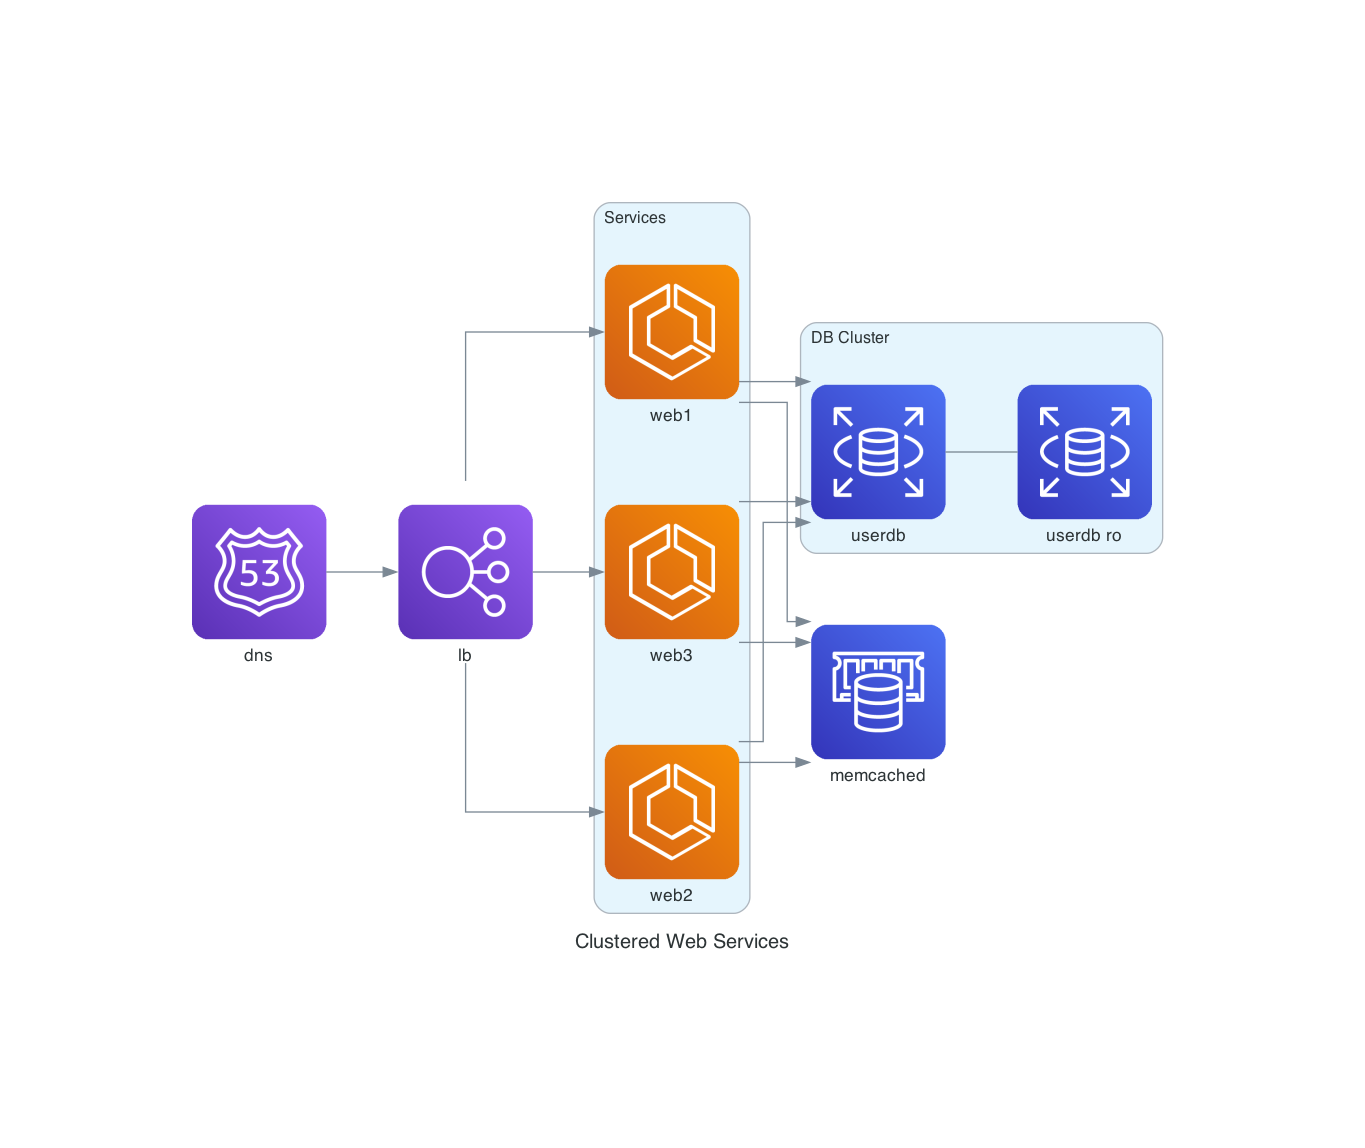

In [22]:
with Diagram("Clustered Web Services", show=False) as diag2:
    dns = Route53("dns")
    lb = ELB("lb")

    with Cluster("Services"):
        svc_group = [ECS("web1"),
                     ECS("web2"),
                     ECS("web3")]

    with Cluster("DB Cluster"):
        db_primary = RDS("userdb")
        db_primary - [RDS("userdb ro")]

    memcached = ElastiCache("memcached")

    dns >> lb >> svc_group
    svc_group >> db_primary
    svc_group >> memcached

diag2

## Event Processing on AWS

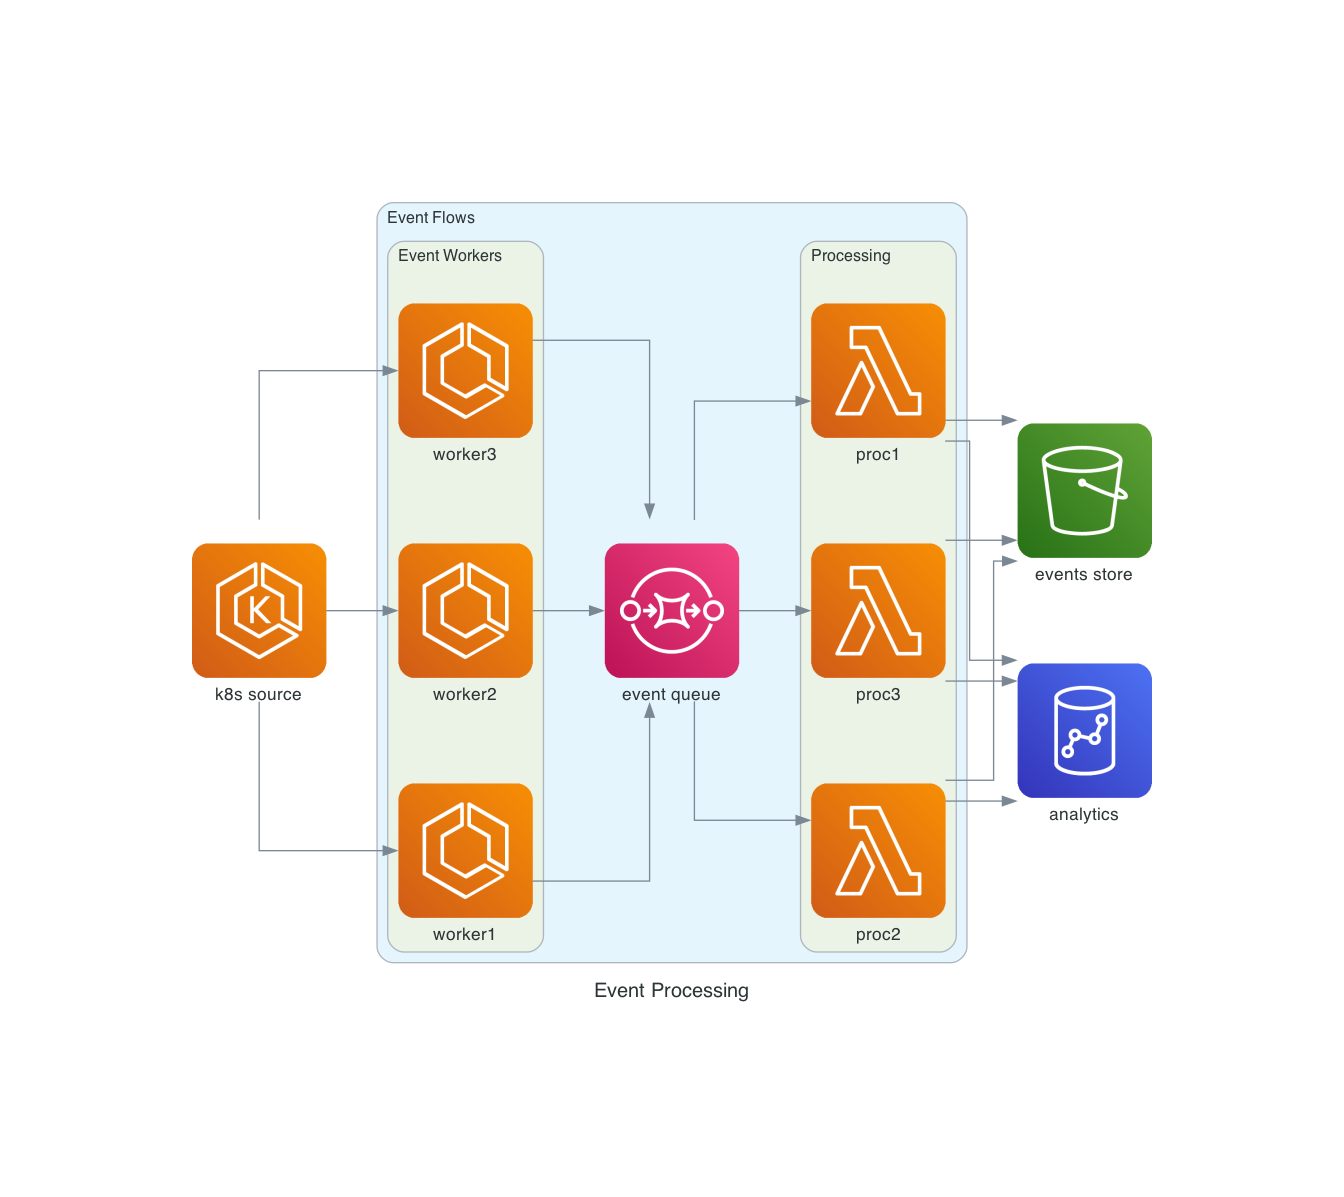

In [25]:
with Diagram("Event Processing", show=False) as diag3:
    source = EKS("k8s source")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [ECS("worker1"),
                       ECS("worker2"),
                       ECS("worker3")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"),
                        Lambda("proc2"),
                        Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw

diag3    